# Library

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load data

In [2]:
df = pd.read_csv('CNN Test/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Transform data

In [3]:
data = np.array(df)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets
print(m,n)

42000 785


# Split data

In [4]:
data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.0

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0

# My CNN

## Model

In [5]:
from Class.cnn import cnn

### Define model

In [6]:
mycnn = cnn (inputLayer = 784)

In [7]:
mycnn.addLayer(neurons=50)
mycnn.addLayer(neurons=20)
mycnn.addLayer(neurons=10)

### Train

(784, 41000)
(784, 36900)
(784, 4100)
(41000,)
(36900,)
(4100,)
Final accuracy: 
0.8228184281842819


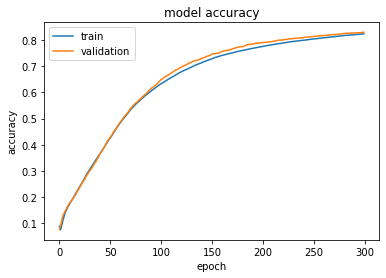

In [8]:
history = mycnn.fit(X_train, Y_train, 0.10, 300, validationSplit = 0.1)
plt.plot(history['train_accuracy'])
plt.plot(history['test_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Test

In [9]:
mycnn.test_prediction(0,X_train, Y_train)
mycnn.test_prediction(1,X_train, Y_train)
mycnn.test_prediction(2,X_train, Y_train)
mycnn.test_prediction(3,X_train, Y_train)

Prediction:  [4]
Label:  4
Prediction:  [3]
Label:  3
Prediction:  [0]
Label:  0
Prediction:  [8]
Label:  1


## Test accuracy

In [10]:
prediction = mycnn.make_prediction(X_test)
mycnn.get_accuracy(prediction, Y_test)

0.818

## Save model

In [11]:
mycnn.saveModel('Weights/testCNN')


### Load model

In [12]:
mycnn2 = cnn(loadModel='Weights/testCNN')

### Test load model

In [13]:
prediction = mycnn2.make_prediction(X_test)
mycnn2.get_accuracy(prediction, Y_test)

0.818

# Keras CNN

## Prepare data

In [14]:
x_test = pd.DataFrame(X_test.T)
x_test
y_test = pd.DataFrame(Y_test.T)
y_test
x_train = pd.DataFrame(X_train.T)
x_train
y_train = pd.DataFrame(Y_train.T)
y_train


,0
0,4
1,3
2,0
3,1
4,7
...,...
40995,3
40996,1
40997,0
40998,0


## Library

In [15]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

## Define model

In [16]:
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=len(x_train.columns)))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


## Train model

In [17]:

history = model.fit(x_train, y_train,validation_split=0.20, epochs=150, verbose=1, batch_size=1000)


Epoch 1/150
33/33 [==============================] - 0s 14ms/step - loss: 1.6011 - accuracy: 0.5308 - val_loss: 0.8696 - val_accuracy: 0.8057
Epoch 2/150
33/33 [==============================] - 0s 7ms/step - loss: 0.6279 - accuracy: 0.8481 - val_loss: 0.4469 - val_accuracy: 0.8843
Epoch 3/150
33/33 [==============================] - 0s 8ms/step - loss: 0.4065 - accuracy: 0.8928 - val_loss: 0.3454 - val_accuracy: 0.9055
Epoch 4/150
33/33 [==============================] - 0s 7ms/step - loss: 0.3350 - accuracy: 0.9085 - val_loss: 0.2959 - val_accuracy: 0.9189
Epoch 5/150
33/33 [==============================] - 0s 8ms/step - loss: 0.2944 - accuracy: 0.9186 - val_loss: 0.2691 - val_accuracy: 0.9245
Epoch 6/150
33/33 [==============================] - 0s 8ms/step - loss: 0.2659 - accuracy: 0.9269 - val_loss: 0.2456 - val_accuracy: 0.9326
Epoch 7/150
33/33 [==============================] - 0s 8ms/step - loss: 0.2437 - accuracy: 0.9321 - val_loss: 0.2309 - val_accuracy: 0.9343
Epoch 8/150


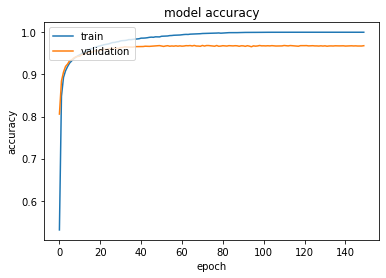

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Test accuracy

In [19]:
y_hat = model.predict_classes(x_test)
y_hat

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([2, 1, 4, 2, 5, 0, 9, 6, 8, 0, 3, 9, 9, 5, 8, 1, 2, 9, 2, 4, 0, 7,
       3, 5, 9, 3, 7, 5, 1, 9, 5, 6, 9, 0, 5, 2, 1, 9, 9, 3, 6, 8, 2, 4,
       9, 7, 9, 4, 4, 1, 3, 6, 0, 1, 2, 0, 2, 6, 4, 4, 4, 3, 7, 5, 1, 2,
       7, 6, 2, 6, 3, 2, 9, 2, 8, 3, 8, 8, 5, 1, 7, 3, 8, 5, 3, 4, 4, 4,
       3, 6, 3, 7, 2, 2, 2, 2, 0, 8, 9, 6, 7, 9, 1, 2, 7, 2, 9, 7, 8, 6,
       0, 4, 5, 2, 9, 6, 8, 2, 7, 4, 0, 9, 5, 4, 6, 5, 3, 7, 8, 4, 6, 6,
       1, 2, 1, 9, 2, 9, 0, 7, 1, 3, 3, 5, 9, 2, 1, 8, 5, 5, 2, 8, 6, 3,
       9, 1, 8, 8, 9, 0, 3, 2, 2, 4, 3, 3, 0, 8, 5, 3, 0, 0, 7, 4, 5, 6,
       2, 9, 1, 6, 6, 1, 3, 0, 3, 7, 6, 7, 4, 0, 8, 5, 1, 4, 0, 6, 4, 4,
       9, 4, 2, 7, 2, 7, 7, 8, 1, 5, 9, 3, 8, 0, 0, 2, 6, 1, 3, 3, 3, 5,
       5, 3, 9, 8, 4, 7, 3, 3, 9, 7, 4, 6, 7, 6, 9, 1, 0, 9, 9, 6, 8, 6,
       3, 9, 6, 8, 5, 2, 3, 5, 7, 1, 7, 9, 0, 1, 9, 7, 2, 5, 8, 7, 9, 6,
       4, 4, 9, 4, 0, 8, 9, 1, 6, 4, 6, 2, 2, 9, 1, 8, 4, 9, 9, 6, 7, 4,
       2, 4, 0, 9, 1, 6, 4, 4, 2, 0, 6, 6, 3, 9, 2,

In [20]:

accuracy_score(y_test, y_hat)

0.962

## Save model

In [22]:
model.save('Weights/test_tfmodel')

INFO:tensorflow:Assets written to: Weights/test_tfmodel\assets


## Load model

In [23]:
model2 = load_model('Weights/test_tfmodel')

In [24]:
y_hat = model2.predict_classes(x_test)
y_hat
accuracy_score(y_test, y_hat)

0.962